# Итоговая работа

In [686]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

from mpl_toolkits.mplot3d  import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from scipy.optimize import minimize
%matplotlib inline

## Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [687]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

#### a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [688]:
#Заведем функцию расчета косинуса угла между векторами -  скалярное произведение делить на произведение евклидовых норм

def cosine(a, b):

    length_a = np.linalg.norm(a)
    lenght_b = np.linalg.norm(b)
    
    return np.dot(a, b) / (length_a * lenght_b)

In [689]:
# Прогоним ее через цикл, где попарно сравним всех пользователей. Критерий - наибольший косинус (наименьший угол)

for i, user in enumerate(list(raitings)):
    
    m = -1
    
    for i_, user_ in enumerate(list(raitings)):

        if i != i_ and cosine(user, user_) > m:
                               
            m = cosine(user, user_)
            best_n = i_ + 1
            
    print('для user ', i + 1, ', ближайший аналог - user ', best_n)

для user  1 , ближайший аналог - user  9
для user  2 , ближайший аналог - user  5
для user  3 , ближайший аналог - user  10
для user  4 , ближайший аналог - user  10
для user  5 , ближайший аналог - user  9
для user  6 , ближайший аналог - user  10
для user  7 , ближайший аналог - user  4
для user  8 , ближайший аналог - user  6
для user  9 , ближайший аналог - user  1
для user  10 , ближайший аналог - user  3


#### b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Для этих целей можно использовать сингулярное разложение (SVD), которое в усеченном виде реализовано, например в методе главных компонента (PCA).

Строится симметричная матрица скалярных произведений всех векторов матрицы. Для этой матрицы находится вектор собственных значений. Результаты  нормализуются (приводятся к единице и получившиеся доли показывают оценочно, какой процент зависимостей объясняют значения того или иного вектора. Можно выбрать лучшие 5.

Но нужно обращать внимание на потерю данных, которая произойдет после выбора. На практике желательно, чтобы потеря не превышала 15-20% объяснения зависимостей


Есть аналогичные методы, например на  базе ковариационных матриц и диспернсий. работают по тому же принипу.

## Задание 2

Вычислите производную 
$tg2(sin(x)+cos(2x+3))$
 в точке 
$x_0=1$
 (на python и на бумаге).

Вручную

In [690]:
#Зададим x как символ
x = sym.Symbol('x')

In [691]:
#вложим функцию в перемнную
fx = sym.tan(sym.sin(x) + sym.cos(2 * x + 3))**2
fx

tan(sin(x) + cos(2*x + 3))**2

In [692]:
#Находим первую производную
dif = sym.diff(fx, x, 1)
dif

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [693]:
#вычисляем производную в точке x=1
dif.subs(x, 1)

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

In [694]:
#Посчитаем числом
2 * (1 + np.tan(np.cos(5) + np.sin(1))**2 )*(np.cos(1) - 2*np.sin(5))*np.tan(np.cos(5) + np.sin(1))

55.385917635337954

Читерский  метод

In [695]:
#Экспортируем
from scipy.misc import derivative

In [696]:
#Решаем 
def f(x):
    return np.tan(np.sin(x) + np.cos(2 * x + 3))**2
    
derivative(f, 1.0, dx=1e-6)

55.3859176464222

## Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>.

In [697]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [698]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [699]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

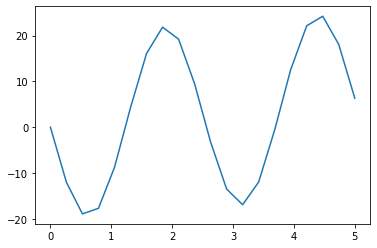

In [700]:
plt.plot(x, fx)
plt.show()

In [701]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Решение

In [702]:
#Запускаем оптимизацию, указываем начальную точку, метод и условия успеха
params = np.random.uniform(low=-5, high=5, size=(2,))
res = minimize(error, params, method='nelder-mead', options = {'xtol': 1e-10, 'disp' : True} )

Optimization terminated successfully.
         Current function value: 237.955663
         Iterations: 111
         Function evaluations: 220


In [703]:
#Окно результатов
res

 final_simplex: (array([[1.96273074, 3.32848357],
       [1.96273074, 3.32848357],
       [1.96273074, 3.32848357]]), array([237.95566303, 237.95566303, 237.95566303]))
           fun: 237.9556630281679
       message: 'Optimization terminated successfully.'
          nfev: 220
           nit: 111
        status: 0
       success: True
             x: array([1.96273074, 3.32848357])

In [704]:
#Лучшие параметры
res.x

array([1.96273074, 3.32848357])

In [705]:
#Результат функции ошибки при параметрах из комментария a = 1.95....., b = 1.56....... - не 0
error([1.95282587, 1.56625207])

228.35671970309423

#### Сделаем несколько итераций и найдем решение аналитически

Здесь я с помощью кода делаю так, что в список итоговых значений параметров  и резльтатов попадали только лучшие, каждая итерация сравнивается с предыдущими, исходная точка - значение error 0.01. 

В итоги не попадут неудачные результаты, в итоги не попадут результаты больше чем 0.01, в итоги не попадут результаты, которые хуже чем те что уже есть. Интервал случайных точек - от -100 до 100! 1000 расчетов!

In [706]:
itlist = []
reslist = []
paramlist = []
result = 0.01

for kk in range(1000):
    
    params = np.random.uniform(low=-100, high=100, size=(2,))
    res = minimize(error, params, method='nelder-mead', options = {'xtol': 1e-10, 'disp' : False} )
    
    if res.fun < result:
        
        result = res.fun
        best_params = res.x
        
        itlist.append(res.nit)
        reslist.append(error(res.x))
        paramlist.append(res.x)

In [707]:
paramlist

[array([ 3.        , 21.37610417]),
 array([ 3. , -2.5]),
 array([ 3. , -2.5]),
 array([ 3. , -2.5]),
 array([ 3. , -2.5])]

In [708]:
reslist

[1.2892899619920684e-05,
 1.5109279836167389e-06,
 1.5108948039355141e-06,
 1.5107201063457865e-06,
 1.5102831421032192e-06]

Точка a показывает хороший результат в районе 3, точка b всегда стремится к -2.5 и останавливается на этом.

Построенный мной цикл работает таким образом, что после найденного лучшего знаечния уже не добавляет новые.

#### Сделаем несколько итераций и покажем графически

Устанавливаем гораздо более лояльные критерии, но сузим диапазон поиска.

Цель - 0.1, чтобы собрать побольше точек, те же 1000 запусков

In [709]:
itlist = []
reslist = []
paramlist = []
target = 0.1

for kk in range(1000):
    
    params = np.random.uniform(low=-10, high=10, size=(2,))
    res = minimize(error, params, method='nelder-mead', options = {'xtol': 1e-10, 'disp' : False} )
    
    if res.fun < target and res.nit<100:
        
        itlist.append(res.nit)
        reslist.append(error(res.x))
        paramlist.append(res.x)

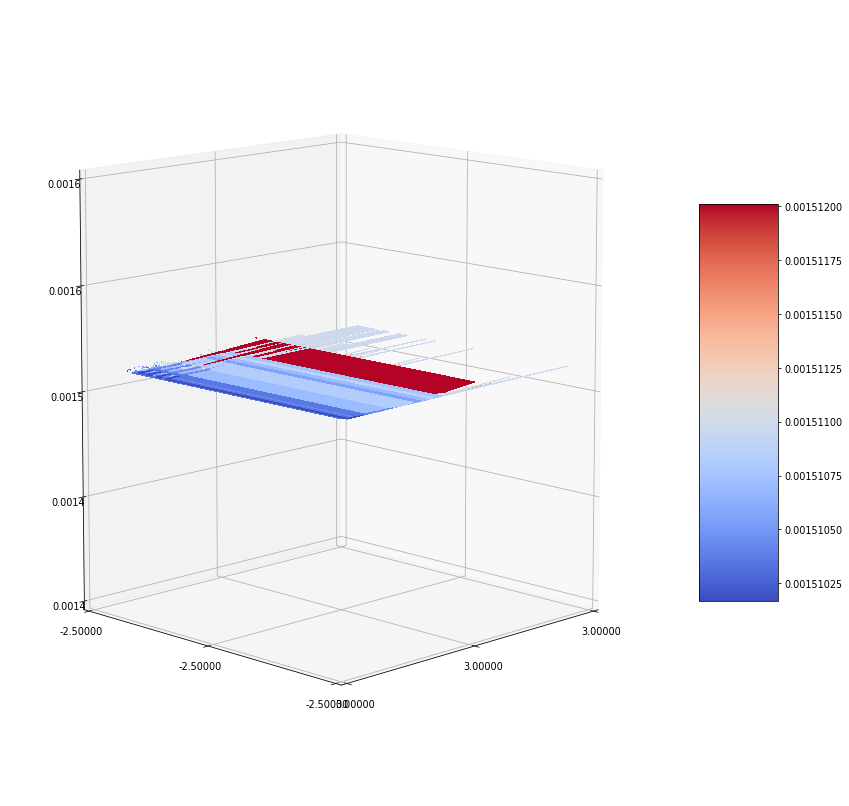

In [711]:
fig = plt.figure(figsize=(15,15), dpi = 70)
ax = fig.gca(projection='3d')

#Make data

X = np.array(paramlist)[:,0]
Y = np.array(paramlist)[:,1]
X, Y = np.meshgrid(X, Y)

Z = np.array([reslist])*1000

#Plot the surface

surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth=0, antialiased=False)

#Customize the z axis

ax.set_zlim(0.0014, 0.0016)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.xaxis.set_major_locator(LinearLocator(3))
ax.yaxis.set_major_locator(LinearLocator(3))

ax.xaxis.set_major_formatter(FormatStrFormatter('%.05f'))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.04f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.05f'))

#Add a color bar which maps values to colors

fig.colorbar(surf, shrink  = 0.5, aspect = 5)

#настроек не так много, но они есть.  можно поменять угол зрения, расстояние до графика и высоту с которой смотрим

ax.azim = 45
ax.dist = 10
ax.elev = 10

plt.show()

#### Подставим 20 значений из списка лучших параметров в функцию f, посмотрим графически

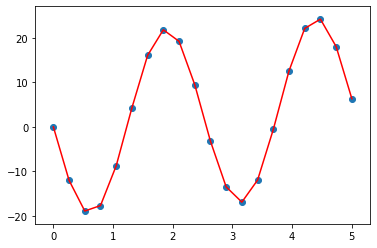

In [712]:
plt.figure()

plt.plot(x, fx, color = 'r')
plt.scatter(x, f(x, np.array(paramlist)[:,0][-20:], np.array(paramlist)[:,1][-20:]))

plt.show()

Параметры подобраны верно, точки на графике

In [713]:
np.array(paramlist)[:,0][-20:]

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3.])

In [714]:
np.array(paramlist)[:,1][-20:]

array([-2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5,
       -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5])

In [715]:
np.array(paramlist)[:,0].mean()

3.000000000532734

In [716]:
np.array(paramlist)[:,1].mean()

-2.499999999981924

Итак, предложен альтернативный вариант расчета, в том числе с более низким порогом входа результата. Проведено несколько тысяч экспериментов на широком диапазоне случайных точек, которые нрас аналитически и графически приводят к тому, что лучшим значением параметра a является 3, параметр b имеет некоторую вариативность, но лучший результат получается при -2.5.

Сделаем расчет error с лучшими параметрами

In [717]:
error([3, -2.5])

1.5163282540697764e-06

## Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

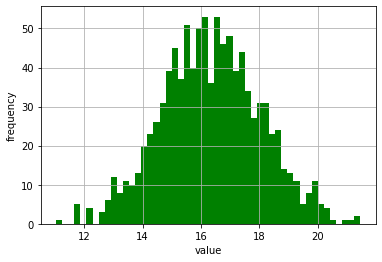

In [718]:
plt.figure()

#Создаем случайную величину и задаем число выборок
elements = np.random.uniform(low=0, high=42, size=(20,)).round()
n = 1000

#Делаем 1000 выборок размера 50, считаем среднее для каждой
values = np.zeros((n, 1))
for i in range(n):
    values[i,0] = np.mean(np.random.choice(elements, 50))
    
#Рисуем 
plt.hist(values, 50, color = 'g')
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid()

plt.show()

## Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

m = np.array([[1, 4],
              [1, 1]])
              
print(m)

In [719]:
m = np.array( [[1, 4], [1, 1]] )
m

array([[1, 4],
       [1, 1]])

In [720]:
#Используем команду из linalg и сразу обращаемся к обоим объектам
w, v = np.linalg.eig(m)

for i in range(len(w)):
    
    print("Собственное значение ", w[i])
    print("соответствующий ему собственный вектор ", v[i] )
    print('')

Собственное значение  3.0000000000000004
соответствующий ему собственный вектор  [ 0.89442719 -0.89442719]

Собственное значение  -0.9999999999999996
соответствующий ему собственный вектор  [0.4472136 0.4472136]



In [721]:
np.linalg.eig(m)

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))